# A different approach
In this notebook I explore the santander data to see potential patterns in the order of features.

In [1]:
import pandas as pd
import matplotlib.pylab as plt
from tqdm import tqdm
pd.set_option('max_columns', 100)
colors = plt.cm.datad["tab20"]['listed']
%matplotlib inline

In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

train_T = train.T.drop(['ID_code','target'])
train_T['feat_mean'] = train_T.mean(axis=1)

train_T['feat_max'] = train_T[[x for x in range(0,200000)]].max(axis=1)
train_T['feat_min'] = train_T[[x for x in range(0,200000)]].min(axis=1)
train_T['feat_std'] = train_T[[x for x in range(0,200000)]].std(axis=1)
train_T['feat_var'] = train_T[[x for x in range(0,200000)]].var(axis=1)
train_T['feat_range'] = train_T['feat_max'] - train_T['feat_min']

## Transpose Training Set and Order by the mean feature
- Plot 500 examples - maybe we can see a pattern.


100%|██████████| 500/500 [04:59<00:00,  1.61it/s]


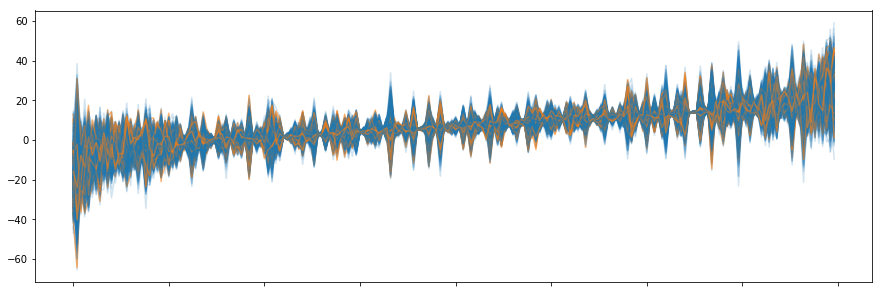

In [3]:
for row in tqdm(range(0, 500)):
    target_of_this = train.loc[row]['target']
    if target_of_this == 0:
        train_T.sort_values('feat_mean')[row].plot(figsize=(15, 5), color=colors[0], alpha=0.2)
    elif target_of_this == 1:
        train_T.sort_values('feat_mean')[row].plot(figsize=(15, 5), color=colors[2], alpha=0.6)

## Lets try that again but plot an equal distribution of positive/negative target

100%|██████████| 5/5 [00:06<00:00,  1.21s/it]


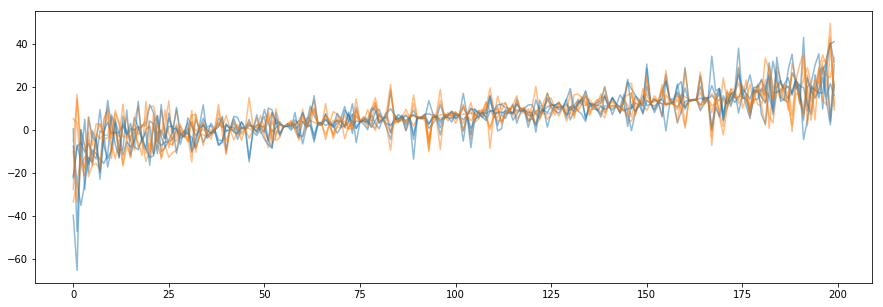

In [5]:
# Identify the index of postitive and negative observations
train_T.index = [x for x in range(0,200)]
negative_index = train.loc[train['target'] == 0].index.values
positive_index = train.loc[train['target'] == 1].index.values

# plot each one
for plotcount in tqdm(range(0, 5)):
    ax = train_T.sort_values('feat_mean')[negative_index[plotcount]].reset_index(drop=True).plot(figsize=(15, 5),
                                                                                                 color=colors[0],
                                                                                                 alpha=0.5)
    train_T.sort_values('feat_mean')[positive_index[plotcount]].reset_index(drop=True).plot(figsize=(15, 5),
                                                                                            color=colors[2],
                                                                                            alpha=0.5)
    ax.tick_params(which='minor', length=4, color='r')

## Maybe making it interactive would help..

In [6]:
from bokeh.io import show, output_notebook
output_notebook()
from bokeh.plotting import figure

Loading BokehJS ...

In [17]:
# plotting only 50 examples of each
p = figure(tools="pan,wheel_zoom,box_zoom,reset,previewsave,hover",
          plot_height=400, plot_width=800)
for plotcount in tqdm(range(0, 50)):
    p.line(train_T.sort_values('feat_mean')[negative_index[plotcount]].reset_index(drop=True).index,
           train_T.sort_values('feat_mean')[negative_index[plotcount]].reset_index(drop=True).values)
    p.line(train_T.sort_values('feat_mean')[positive_index[plotcount]].reset_index(drop=True).index,
           train_T.sort_values('feat_mean')[positive_index[plotcount]].reset_index(drop=True).values,
          color='orange')
show(p)

100%|██████████| 50/50 [02:00<00:00,  2.44s/it]


# Standard Scale Features before plotting

In [15]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled = ss.fit_transform(train[['var_{}'.format(x) for x in range(0, 200)]])

scaleddf = pd.DataFrame(scaled)
scaleddf_T = scaleddf.T

## Within each observation (row) sort the scaled columns in ascending order
- This could just be a data property but it appears that the positive/negative observations diverge at the ends.

100%|██████████| 5000/5000 [06:59<00:00,  4.38it/s]


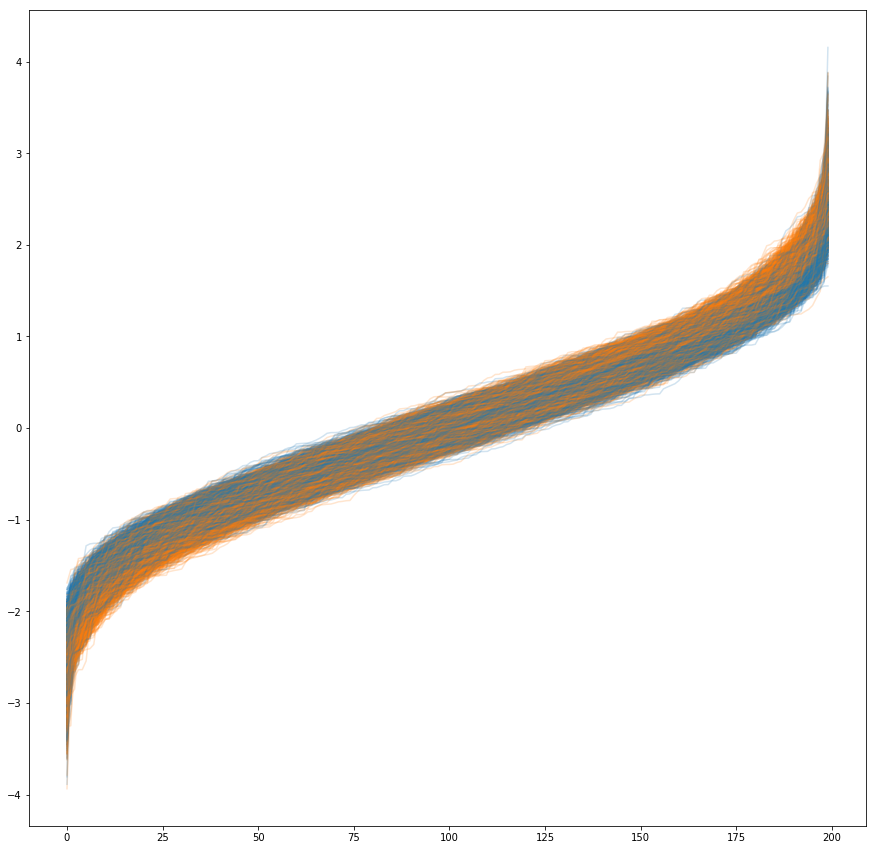

In [16]:
for plotcount in tqdm(range(0, 5000)):
    scaleddf_T[negative_index[plotcount]].sort_values().reset_index(drop=True).plot(figsize=(15, 15), color=colors[0], alpha=0.2)
    scaleddf_T[positive_index[plotcount]].sort_values().reset_index(drop=True).plot(figsize=(15, 15), color=colors[2], alpha=0.2)

Interesting looking but I don't think it leads to anything useful....